In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_excel(r'C:\Users\user\OneDrive\Documents\Sem 4\Business Intelligence\telco-churn-filtered.xlsx')
df

,CustomerID,Tenure Months,Internet Service,Contract,Payment Method,Monthly Charges,Total Charges,Churn Label
0,3668-QPYBK,2,DSL,Month-to-month,Mailed check,53.85,108.15,1
1,9237-HQITU,2,Fiber optic,Month-to-month,Electronic check,70.70,151.65,1
2,9305-CDSKC,8,Fiber optic,Month-to-month,Electronic check,99.65,820.50,1
3,7892-POOKP,28,Fiber optic,Month-to-month,Electronic check,104.80,3046.05,1
4,0280-XJGEX,49,Fiber optic,Month-to-month,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...
995,0177-PXBAT,33,Fiber optic,Month-to-month,Bank transfer (automatic),109.90,3694.70,0
996,2519-ERQOJ,33,DSL,Month-to-month,Electronic check,54.60,1803.70,0
997,5876-QMYLD,23,No,One year,Mailed check,20.05,415.10,0
998,2277-AXSDC,32,No,One year,Bank transfer (automatic),19.75,624.15,0


In [6]:
# Drop CustomerID
df = df.drop('CustomerID', axis=1)

# Identify features and target
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

In [7]:
X = pd.get_dummies(X, columns=['Internet Service', 'Contract', 'Payment Method'], drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        60
           1       0.85      0.96      0.90       140

    accuracy                           0.85       200
   macro avg       0.85      0.78      0.80       200
weighted avg       0.85      0.85      0.84       200



In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        60
           1       0.85      0.90      0.88       140

    accuracy                           0.82       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.82      0.82      0.82       200



In [12]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.62      0.73        60
           1       0.85      0.96      0.91       140

    accuracy                           0.86       200
   macro avg       0.87      0.79      0.82       200
weighted avg       0.86      0.86      0.85       200



In [13]:
contract_churn = df.groupby('Contract')['Churn Label'].mean().reset_index()

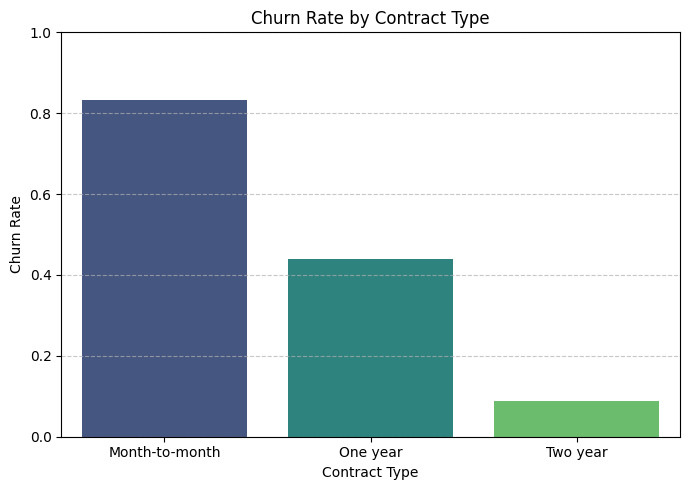

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='Contract', y='Churn Label', data=contract_churn, hue='Contract', palette='viridis', legend=False)
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.title('Churn Rate by Contract Type')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9572\1042696776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='Set2')


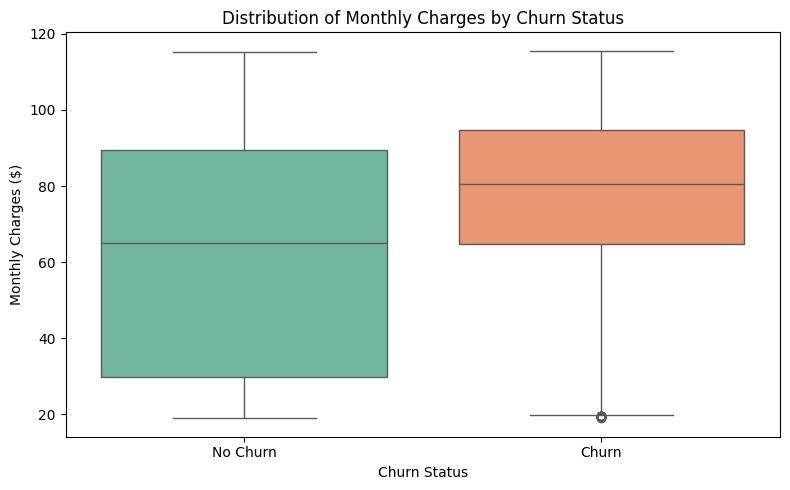

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df, palette='Set2')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_29592\3765327185.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn Label'].mean().reset_index()


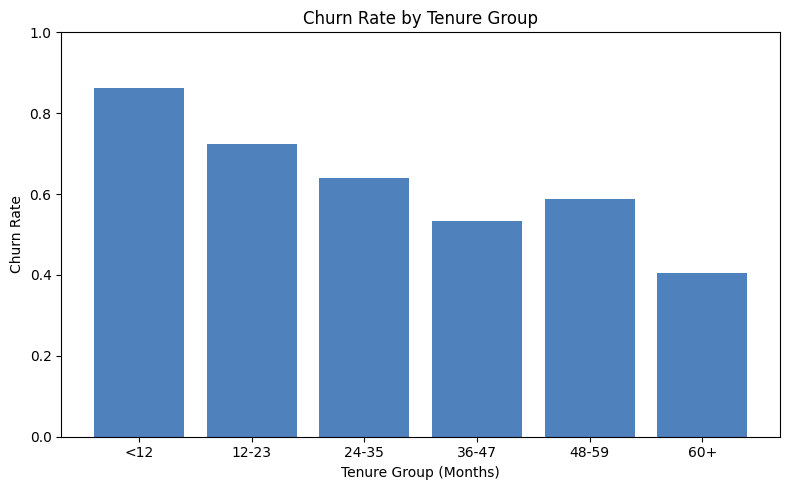

In [44]:
bins = [0, 12, 24, 36, 48, 60, df['Tenure Months'].max()]
labels = ['<12', '12-23', '24-35', '36-47', '48-59', '60+']
df['TenureGroup'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=False)

# Calculate churn rate by tenure group
tenure_churn = df.groupby('TenureGroup')['Churn Label'].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(tenure_churn['TenureGroup'], tenure_churn['Churn Label'], color='#4F81BD')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure Group')
plt.ylim(0,1)
plt.tight_layout()
plt.show()